<a href="https://colab.research.google.com/github/nkljukin/Python-train/blob/main/titanic_tree_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML

In [52]:
style = "<style>svg{width:70% !important;heigth:70% !important;}<style>"
HTML(style)

In [53]:
data = pd.read_csv("/content/sample_data/train.csv")

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data.isnull().sum() # пропущенные значения

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
X = data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data.Survived

In [57]:
X = pd.get_dummies(X) # знаковые переменные в числовые

In [58]:
X = X.fillna({'Age': X.Age.median()})

In [59]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=20, random_state=42)

In [60]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

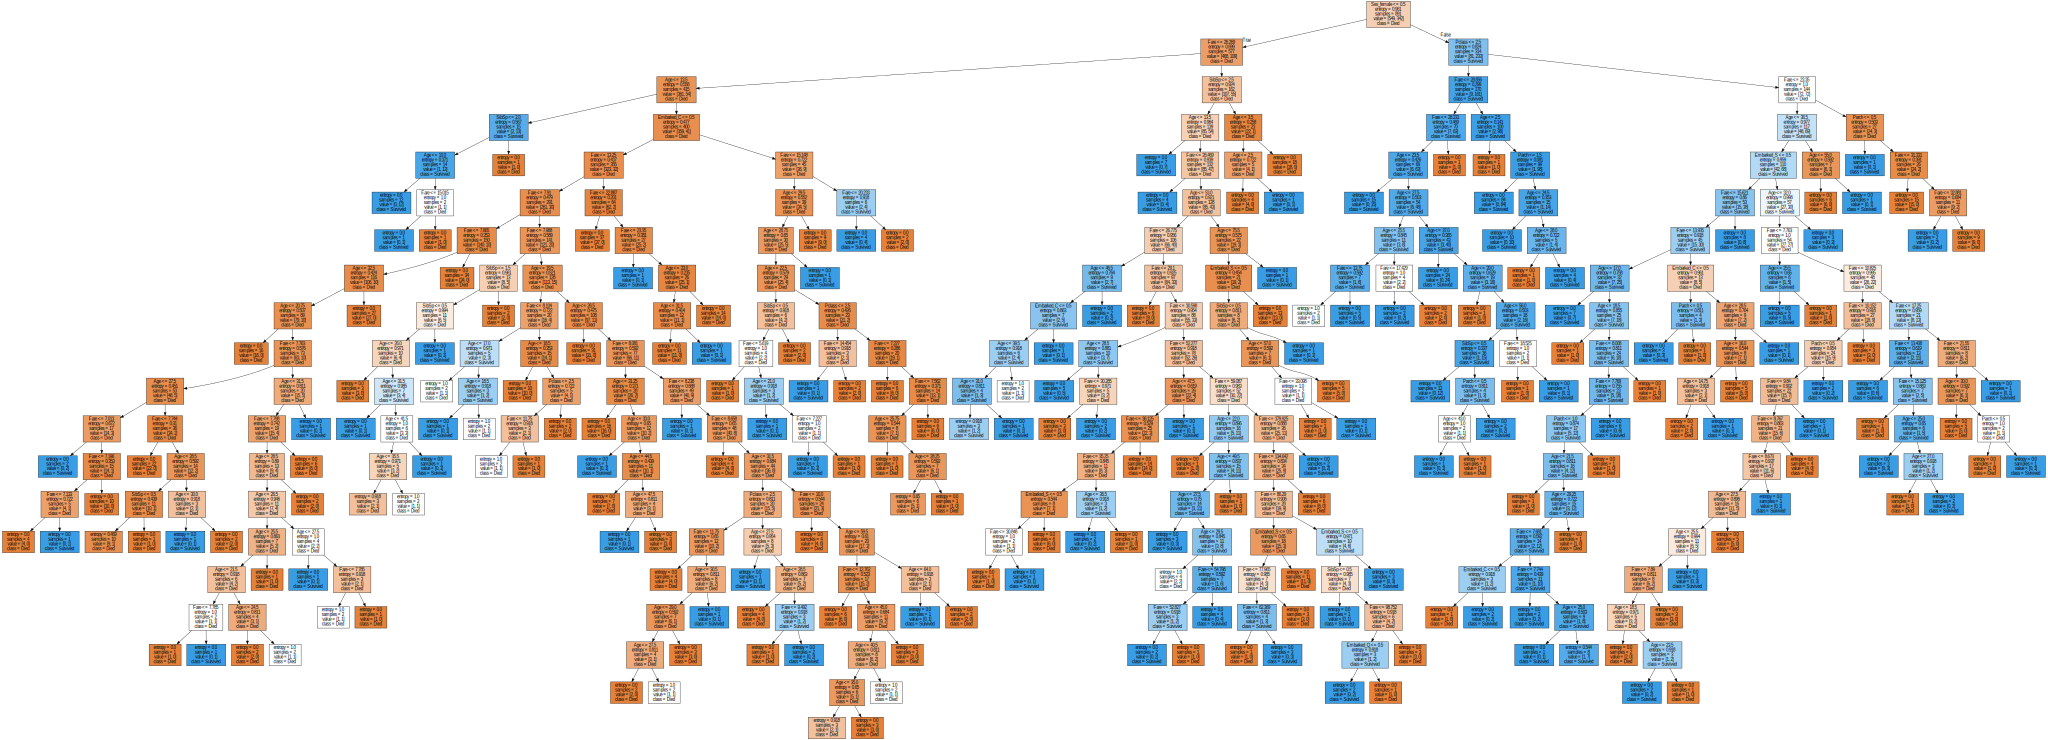

In [61]:
graph = Source(tree.export_graphviz(clf, out_file = None, feature_names = list(X),
                                   class_names = ['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [64]:
X_train.shape

(596, 10)

In [65]:
clf.score(X, y)

0.9797979797979798

In [66]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

In [67]:
clf.score(X_train, y_train)

0.9798657718120806

In [68]:
clf.score(X_test, y_test)

0.7762711864406779

In [69]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=42)

In [70]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [71]:
clf.score(X_train, y_train)

0.8238255033557047

In [72]:
clf.score(X_test, y_test)

0.8203389830508474

In [73]:
max_depth_values = range(1, 100)

In [74]:
scores_data = pd.DataFrame()

In [75]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=42)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [76]:
scores_data

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780
...,...,...,...
0,95,0.979866,0.776271
0,96,0.979866,0.776271
0,97,0.979866,0.776271
0,98,0.979866,0.776271


In [77]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score',	'test_score'],
                           var_name = 'set_type', value_name = 'score')

In [78]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.776271
194,96,test_score,0.776271
195,97,test_score,0.776271
196,98,test_score,0.776271


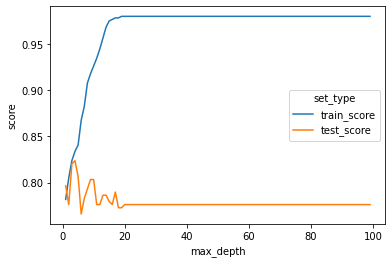

In [79]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state=42)

In [82]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [83]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [94]:
max_depth_values = range(1, 20)
scores_data_1 = pd.DataFrame()

In [95]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=42)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'mean_cross_val': [mean_cross_val_score]})
    scores_data_1 = scores_data_1.append(temp_score_data)

In [96]:
scores_data_long_1 = pd.melt(scores_data_1, id_vars = ['max_depth'], 
                             value_vars = ['train_score',	'test_score', 'mean_cross_val'],
                             var_name = 'set_type', value_name = 'score')

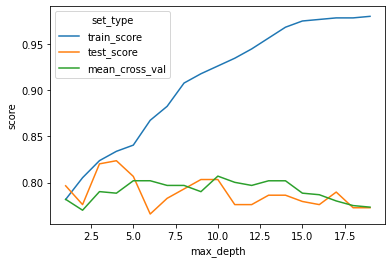

In [97]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long_1)

In [99]:
scores_data_long_1.query("set_type == 'mean_cross_val'").head(20)

,max_depth,set_type,score
38,1,mean_cross_val,0.781961
39,2,mean_cross_val,0.770196
40,3,mean_cross_val,0.790322
41,4,mean_cross_val,0.788627
42,5,mean_cross_val,0.802073
43,6,mean_cross_val,0.802073
44,7,mean_cross_val,0.797017
45,8,mean_cross_val,0.797003
46,9,mean_cross_val,0.790266
47,10,mean_cross_val,0.807073


In [100]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10, random_state=42)

In [102]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.8